In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
import wrangle
from pydataset import data
np.random.seed(4)

In [2]:
iris = wrangle.get_iris_data()

In [3]:
iris_db = iris.drop(columns = ['species_id', 'measurement_id',])

In [4]:
iris_db

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
X = iris_db[['petal_width', 'sepal_width']]


In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [7]:
iris_db['cluster'] = kmeans.predict(X)

In [8]:
X['cluster'] = kmeans.predict(X)

In [9]:
iris_db.groupby('species_name').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species_name,,,,,
setosa,5.006,3.428,1.462,0.246,1.02
versicolor,5.936,2.770,4.260,1.326,1.84
virginica,6.588,2.974,5.552,2.026,0.24


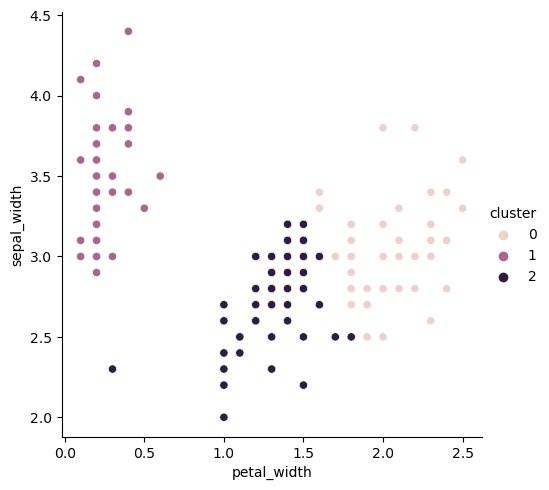

In [10]:
sns.relplot(data=iris_db, x='petal_width', y='sepal_width', hue='cluster')

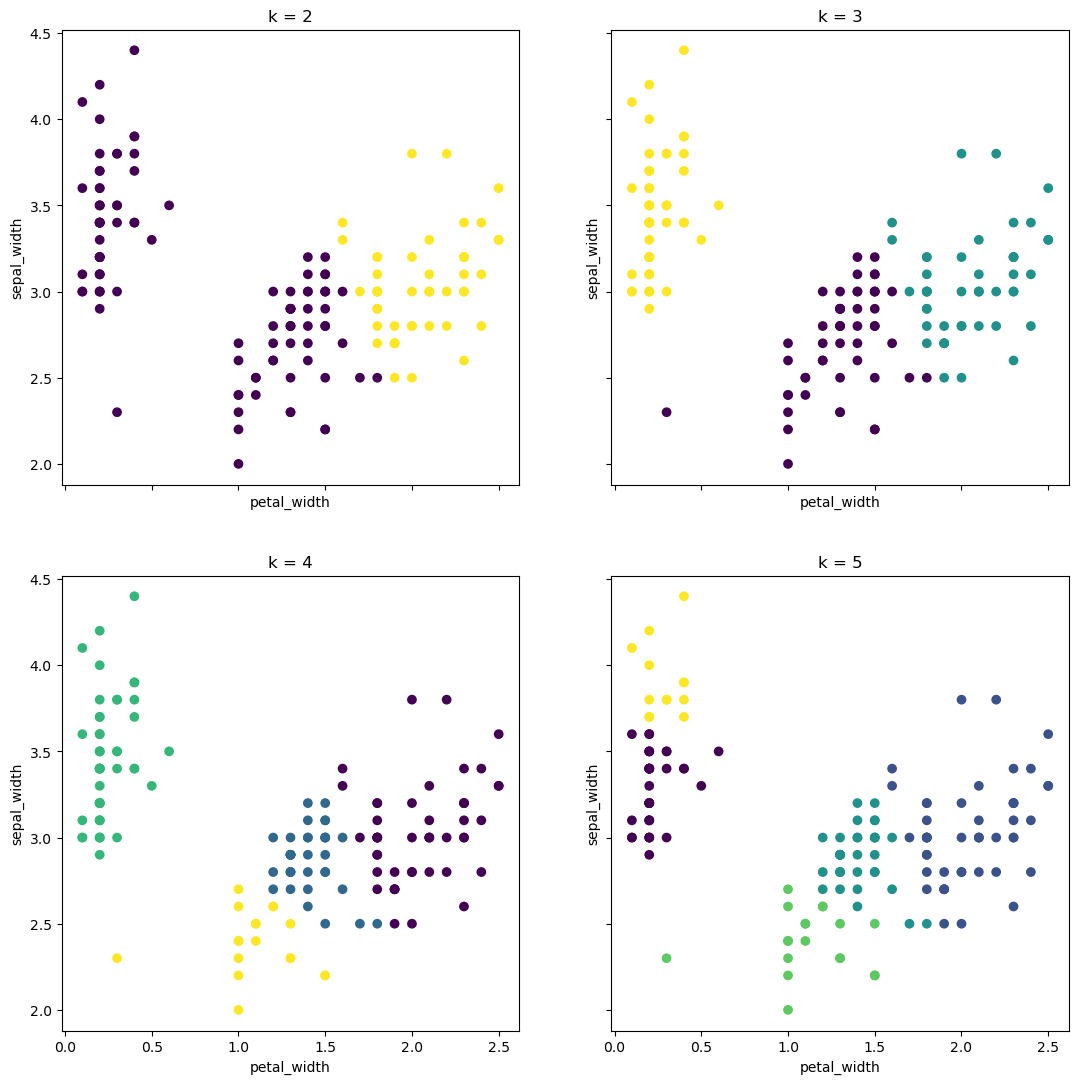

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='petal_width', ylabel='sepal_width')

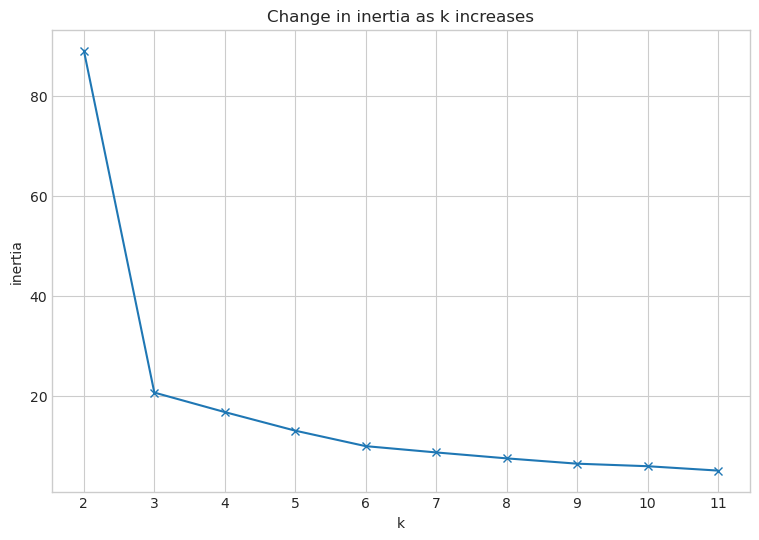

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [13]:
X = iris_db[['petal_width', 'sepal_width','petal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
iris_db['cluster'] = kmeans.predict(X)
X['cluster'] = kmeans.predict(X)
iris_db.groupby('species_name').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species_name,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.92
virginica,6.588,2.974,5.552,2.026,1.10


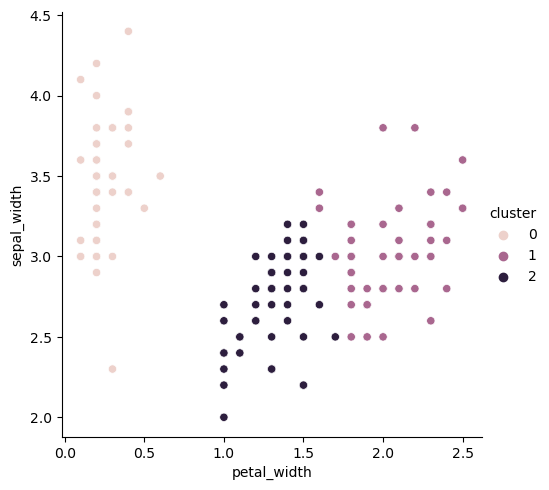

In [14]:
sns.relplot(data=iris_db, x='petal_width', y='sepal_width', hue='cluster')

In [15]:
# fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

# for ax, k in zip(axs.ravel(), range(2, 6)):
    
#     clusters = KMeans(k).fit(X).predict(X)
    
#     ax.scatter(X.petal_width, X.sepal_width, c=clusters)
    
#     ax.set(title='k = {}'.format(k), xlabel='petal_width', ylabel='sepal_width')

In [16]:
X = iris_db[['petal_width', 'sepal_width','petal_width']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
# kmeans.predict(X)
iris_db['cluster'] = kmeans.predict(X)
X['cluster'] = kmeans.predict(X)
iris_db.groupby('species_name').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species_name,,,,,
setosa,5.006,3.428,1.462,0.246,2.00
versicolor,5.936,2.770,4.260,1.326,0.08
virginica,6.588,2.974,5.552,2.026,0.90


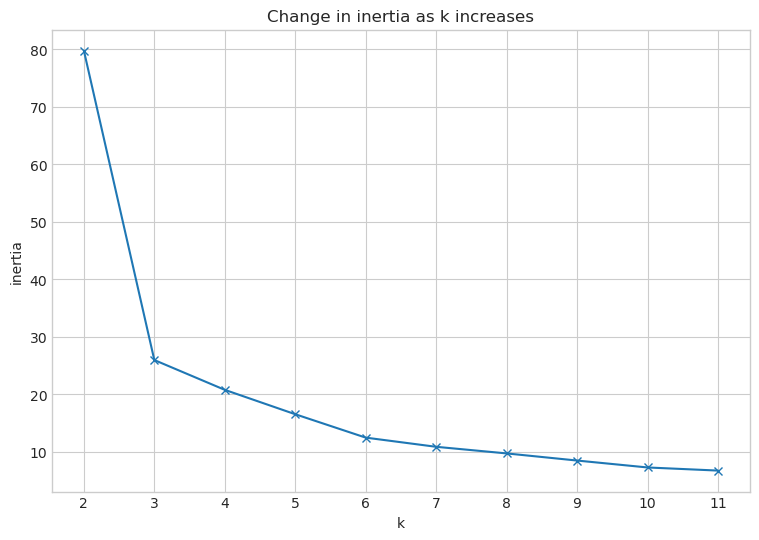

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [18]:
mall_df = wrangle.get_mall_customers()

In [19]:
mall_df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
X = mall_df[['age', 'annual_income']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
mall_df['cluster'] = kmeans.predict(X)
X['cluster'] = kmeans.predict(X)
mall_df.groupby('age').mean()

,customer_id,annual_income,spending_score,cluster
age,,,,
18,76.750000,51.250000,60.000000,0.500000
19,97.000000,57.000000,39.750000,0.375000
20,59.200000,41.600000,40.200000,0.600000
21,52.200000,38.800000,66.800000,0.800000
22,36.666667,31.333333,70.000000,1.000000
23,57.833333,41.500000,63.333333,0.666667
24,49.500000,39.250000,71.500000,0.750000
25,100.000000,57.666667,39.666667,0.333333
26,90.000000,58.000000,54.500000,0.500000


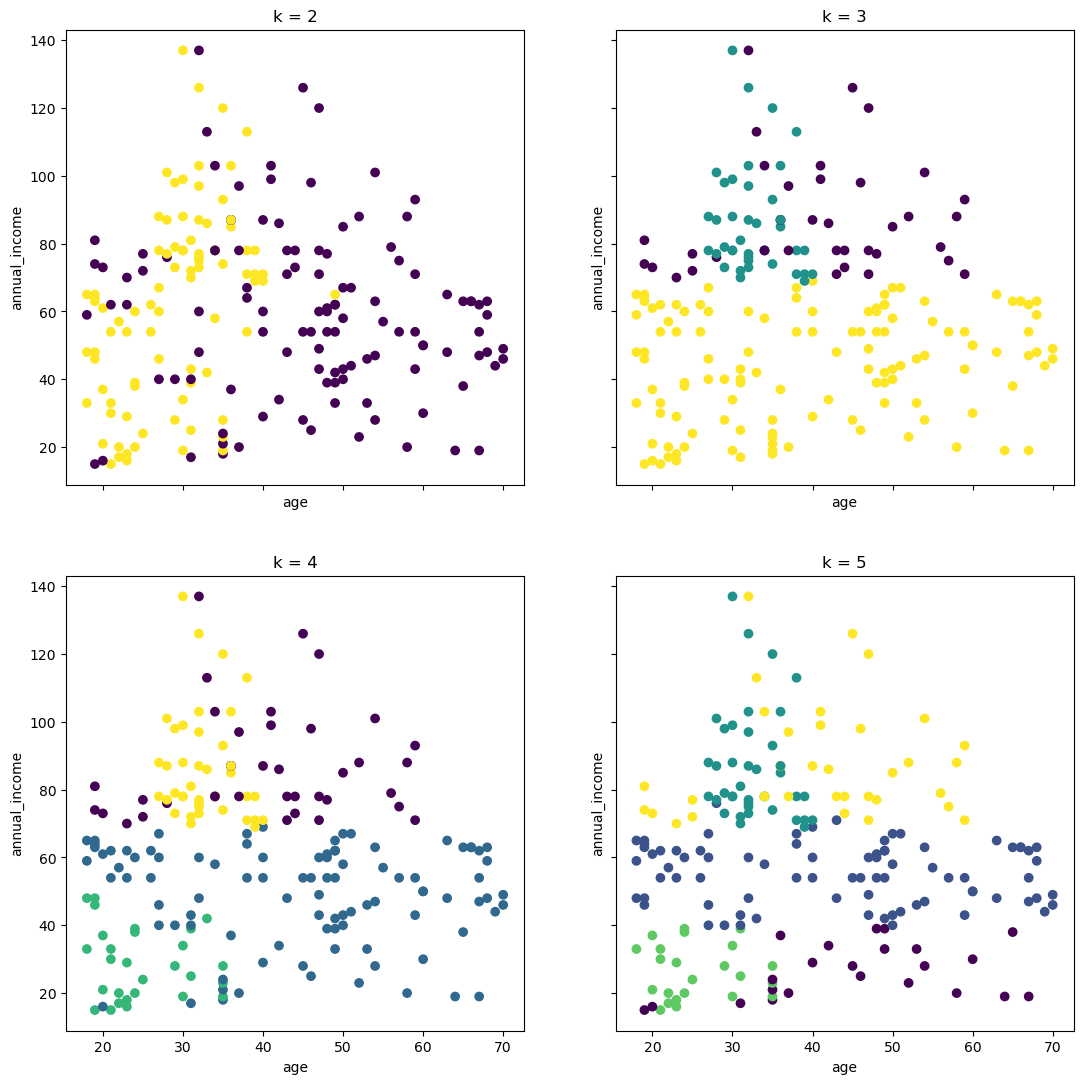

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.age, X.annual_income, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual_income')

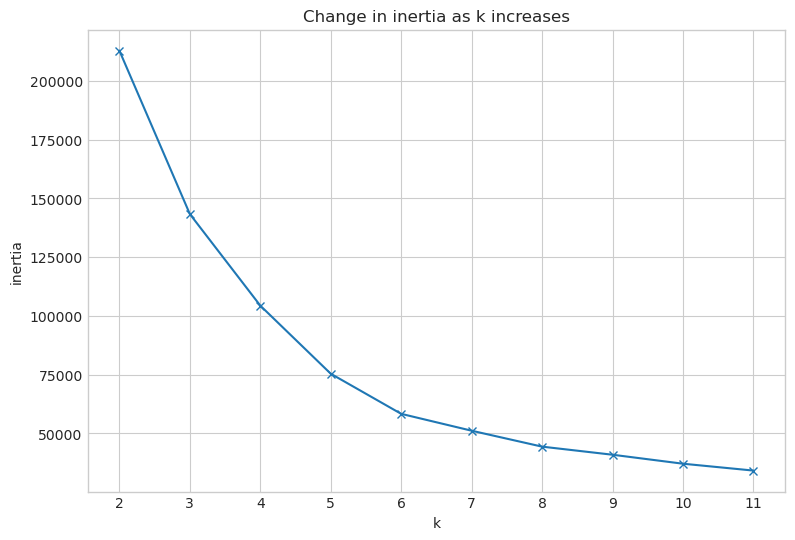

In [22]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [23]:
data_to_send = mall_df.drop(columns = ['gender','customer_id','cluster'])

robust_scaled_data = pd.DataFrame(wrangle.standard_scaler_small(data_to_send),
                     columns=['age', 'annual_income','spending_score'])


In [24]:
X = robust_scaled_data[['age', 'annual_income','spending_score']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
mall_df['cluster'] = kmeans.predict(X)
X['cluster'] = kmeans.predict(X)
mall_df.groupby('gender').mean()

,customer_id,age,annual_income,spending_score,cluster
gender,,,,,
Female,97.562500,38.098214,59.250000,51.526786,0.839286
Male,104.238636,39.806818,62.227273,48.511364,0.897727


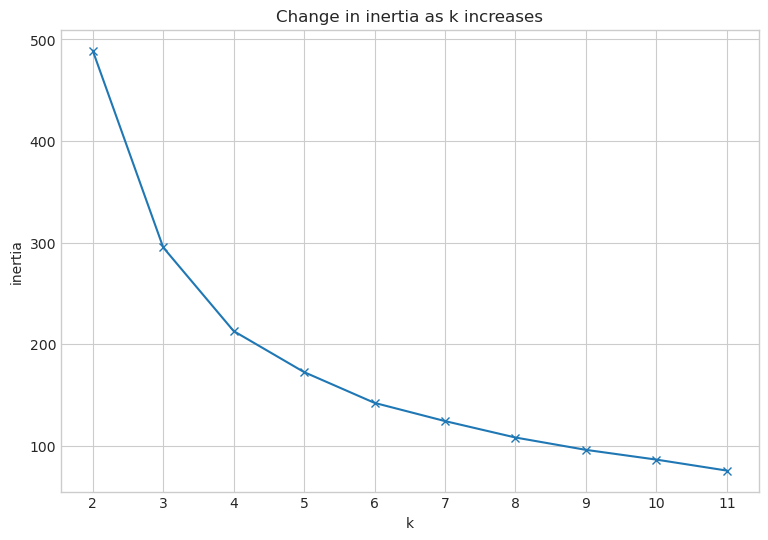

In [25]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [26]:
# df = pd.read_clipboard()

In [27]:
# df.to_csv('google_data.csv')

In [28]:
the_data = pd.read_csv('google_data.csv')

In [29]:
the_data = the_data.drop(columns =['Unnamed: 0'])

In [30]:
the_data

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804
...,...,...
795,3.941363,5.807617
796,6.057122,6.010463
797,8.373651,4.641515
798,-2.058756,6.077125


In [31]:
# x_robust_scaled_data = pd.DataFrame(wrangle.standard_scaler_small(the_data),
#                      columns=['x', 'y'])


X = the_data[['x','y']]


kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

the_data['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

X


,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,0
2,-6.505373,0.068072,1
3,7.730963,0.585521,2
4,17.283668,0.344804,2
...,...,...,...
795,3.941363,5.807617,1
796,6.057122,6.010463,2
797,8.373651,4.641515,2
798,-2.058756,6.077125,1


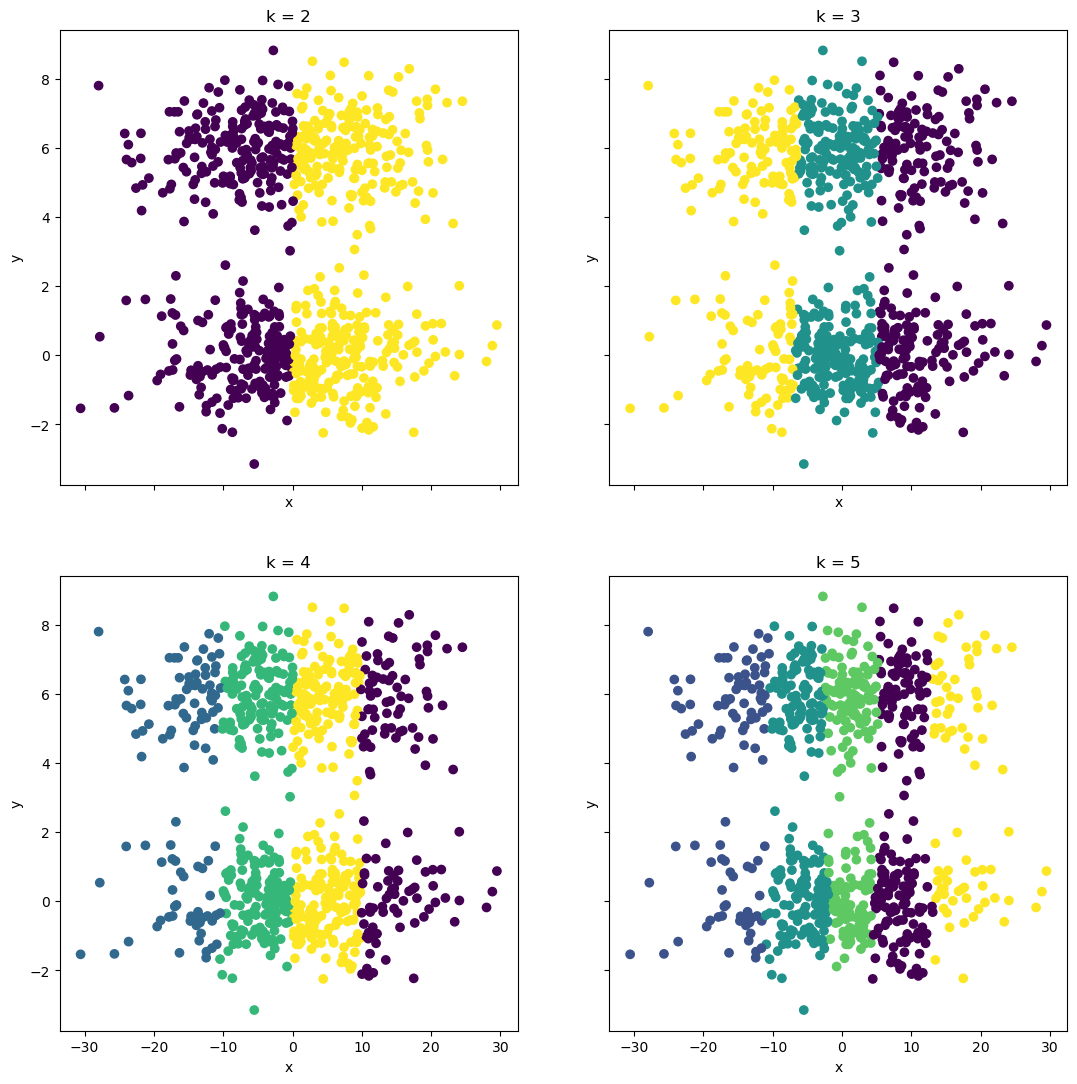

In [32]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.x, X.y, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='x', ylabel='y')

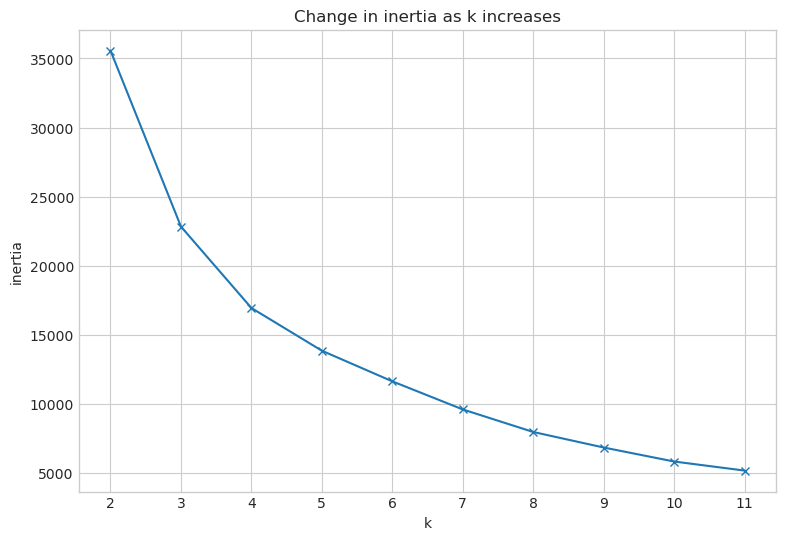

In [33]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [34]:


robust_scaled_data = pd.DataFrame(wrangle.standard_scaler_small(the_data[['x','y']]),
                     columns=['x', 'y'])

X = robust_scaled_data[['x','y']]

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

the_data['cluster'] = kmeans.predict(X)

X['cluster'] = kmeans.predict(X)

X

,x,y,cluster
0,-0.419211,-0.904027,2
1,-0.821099,-0.368472,1
2,-0.708466,-0.920978,2
3,0.729546,-0.756937,2
4,1.694464,-0.833249,2
...,...,...,...
795,0.346758,0.898557,0
796,0.560471,0.962863,0
797,0.794464,0.528883,0
798,-0.259313,0.983996,1


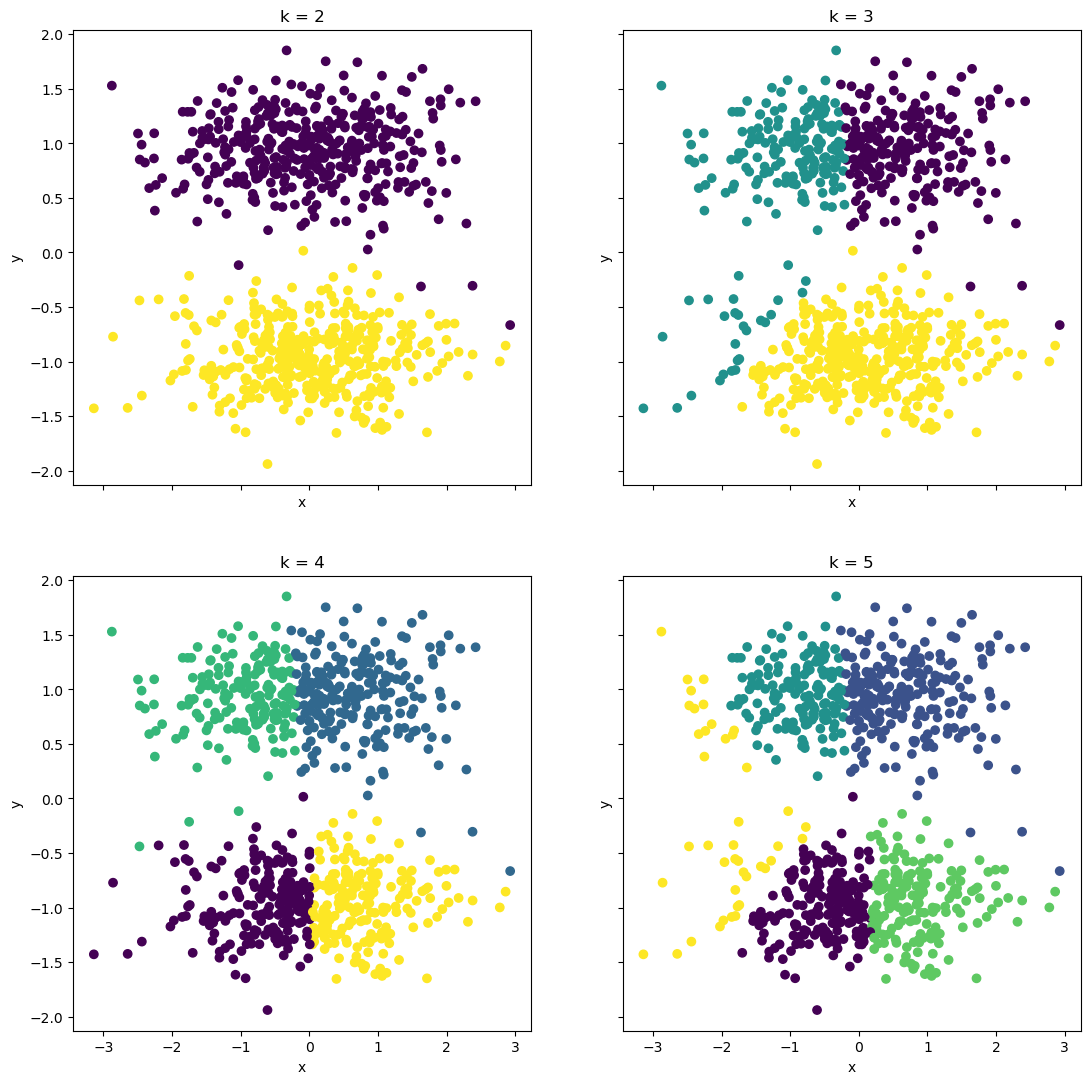

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    
    clusters = KMeans(k).fit(X).predict(X)
    
    ax.scatter(X.x, X.y, c=clusters)
    
    ax.set(title='k = {}'.format(k), xlabel='x', ylabel='y')

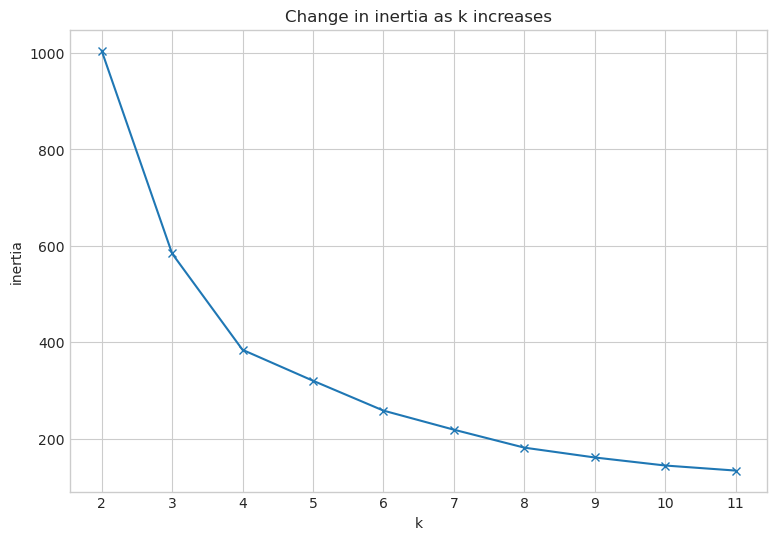

In [36]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')